In [2]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import progressbar
from alive_progress import alive_bar
import time
import os
import collections
import random


from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,InputLayer, Flatten
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model


from sklearn.metrics import multilabel_confusion_matrix



## ANN_1  for 1D data

In [17]:
X=np.load("ImageData1D.npy")
y=np.load("LabelD.npy")
y=y.astype(int)
print(X.shape,y.shape)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
modelANN = Sequential()
modelANN.add(Dense(100, activation='relu'))
modelANN.add(Dense(20, activation='relu'))
modelANN.add(Dense(5, activation='softmax'))
modelANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
historyANN=modelANN.fit(x=X_train,y=y_train,
                        batch_size=200,
                        epochs=50,
                        verbose="auto",
                        validation_data=(X_test,y_test),
                        shuffle=True)

Epoch 1/50
238/238 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.6072 - val_loss: 0.4096 - val_accuracy: 0.5509
Epoch 2/50
238/238 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.5930 - val_loss: 0.3627 - val_accuracy: 0.5875
Epoch 3/50
238/238 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.5867 - val_loss: 0.3042 - val_accuracy: 0.5743
Epoch 4/50
238/238 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.5792 - val_loss: 0.2853 - val_accuracy: 0.5830
Epoch 5/50
238/238 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.5800 - val_loss: 0.3113 - val_accuracy: 0.5678
Epoch 6/50
238/238 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.5805 - val_loss: 0.2746 - val_accuracy: 0.5790
Epoch 7/50
238/238 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.5810 - val_loss: 0.2753 - val_accuracy: 0.5877
Epoch 

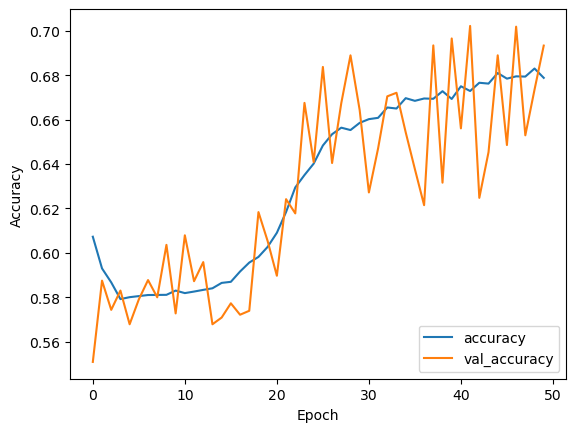

In [34]:
plt.plot(historyANN.history['accuracy'], label='accuracy')
plt.plot(historyANN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [52]:
y_pred=modelANN.predict(X_test)
yPred=y_pred.round().astype(int)
y_test=y_test.astype(int)
multilabel_confusion_matrix(y_test,yPred) # Gate, The joy of players, yellow card , Red Card, Ball

array([[[ 6717,   364],
        [ 3060,  1715]],

       [[11571,     1],
        [  282,     2]],

       [[11745,     0],
        [  111,     0]],

       [[11838,     0],
        [   18,     0]],

       [[ 1363,   922],
        [ 2010,  7561]]], dtype=int64)

## ANN_2 with class weights 

In [54]:
# calculate class weights
def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False):
 
    mlb = None
    n_samples = len(class_series)
    n_classes = len(class_series[0])

    # Count each class frequency
    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1
    
    # Compute class weights using balanced method
    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))

In [56]:
clweights=generate_class_weights(y_train, multi_class=False, one_hot_encoded=True)
clweights

{0: 0.4930955599459291,
 1: 8.693125572868928,
 2: 19.75875,
 3: 178.94716981132075,
 4: 0.24881158507791595}

In [57]:
modelANN = Sequential()
modelANN.add(Dense(100, activation='relu'))
modelANN.add(Dense(20, activation='relu'))
modelANN.add(Dense(5, activation='softmax'))
modelANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
historyANN=modelANN.fit(x=X_train,y=y_train,
                        batch_size=200,
                        epochs=50,
                        verbose="auto",
                        validation_data=(X_test,y_test),
                        shuffle=True,
                        class_weight=clweights)

Epoch 1/50
238/238 [==============================] - 1s 3ms/step - loss: 3.6831 - accuracy: 0.4790 - val_loss: 0.6585 - val_accuracy: 0.5649
Epoch 2/50
238/238 [==============================] - 1s 2ms/step - loss: 0.5829 - accuracy: 0.5620 - val_loss: 0.6255 - val_accuracy: 0.5649
Epoch 3/50
238/238 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.5620 - val_loss: 0.6005 - val_accuracy: 0.5649
Epoch 4/50
238/238 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.5620 - val_loss: 0.5818 - val_accuracy: 0.5649
Epoch 5/50
238/238 [==============================] - 1s 2ms/step - loss: 0.5215 - accuracy: 0.5620 - val_loss: 0.5682 - val_accuracy: 0.5649
Epoch 6/50
238/238 [==============================] - 1s 2ms/step - loss: 0.5109 - accuracy: 0.5620 - val_loss: 0.5574 - val_accuracy: 0.5649
Epoch 7/50
238/238 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.5620 - val_loss: 0.5496 - val_accuracy: 0.5649
Epoch 

In [59]:
y_pred=modelANN.predict(X_test)
yPred=y_pred.round().astype(int)
y_test=y_test.astype(int)
multilabel_confusion_matrix(y_test,yPred)

371/371 [==============================] - 0s 1ms/step


array([[[ 7081,     0],
        [ 4775,     0]],

       [[11572,     0],
        [  284,     0]],

       [[11745,     0],
        [  111,     0]],

       [[11838,     0],
        [   18,     0]],

       [[ 2285,     0],
        [ 9571,     0]]], dtype=int64)

## CNN_1 for 2D data

In [12]:
X=np.load("ImageData2D.npy")
y=np.load("Labe2D.npy")
X=X/255
y=y.astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.shape,y_train.shape

((47420, 36, 64), (47420, 5))

In [14]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],-1)
X_train.shape

(47420, 36, 64, 1)

In [15]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],-1)
X_test.shape

(11856, 36, 64, 1)

In [16]:
# 3-LAYER CNN for image classification
modelCNN = Sequential()
modelCNN.add(Conv2D(10, (2, 2), input_shape=(36,64,1)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))

modelCNN.add(Flatten())
modelCNN.add(Dense(32))
modelCNN.add(Activation('relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(5))
modelCNN.add(Activation('softmax'))

In [17]:
modelCNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
historyCNN=modelCNN.fit(x=X_train,y=y_train,
                        batch_size=200,
                        epochs=50,
                        verbose="auto",
                        validation_data=(X_test,y_test),
                        shuffle=True)

Epoch 1/50
238/238 [==============================] - 10s 42ms/step - loss: 0.2988 - accuracy: 0.5827 - val_loss: 0.2219 - val_accuracy: 0.5886
Epoch 2/50
238/238 [==============================] - 13s 54ms/step - loss: 0.2433 - accuracy: 0.6181 - val_loss: 0.2088 - val_accuracy: 0.6290
Epoch 3/50
238/238 [==============================] - 11s 47ms/step - loss: 0.2266 - accuracy: 0.6380 - val_loss: 0.2052 - val_accuracy: 0.6142
Epoch 4/50
238/238 [==============================] - 14s 58ms/step - loss: 0.2175 - accuracy: 0.6496 - val_loss: 0.1959 - val_accuracy: 0.6715
Epoch 5/50
238/238 [==============================] - 15s 61ms/step - loss: 0.2122 - accuracy: 0.6625 - val_loss: 0.1953 - val_accuracy: 0.6617
Epoch 6/50
238/238 [==============================] - 14s 60ms/step - loss: 0.2091 - accuracy: 0.6683 - val_loss: 0.1919 - val_accuracy: 0.6942
Epoch 7/50
238/238 [==============================] - 13s 54ms/step - loss: 0.2055 - accuracy: 0.6761 - val_loss: 0.1879 - val_accuracy:

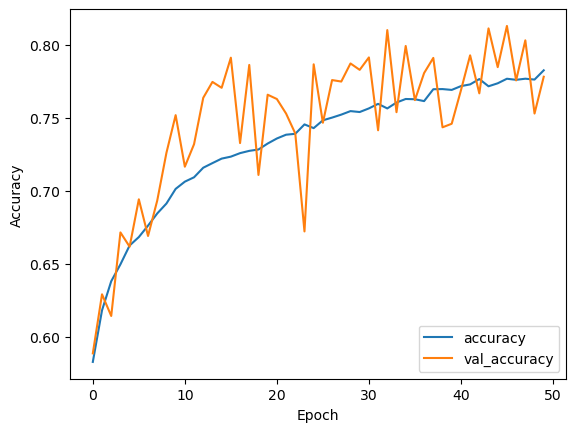

In [18]:
plt.plot(historyCNN.history['accuracy'], label='accuracy')
plt.plot(historyCNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [19]:
y_pred=modelCNN.predict(X_test)
yPred=y_pred.round().astype(int)
y_test=y_test.astype(int)
multilabel_confusion_matrix(y_test,yPred)

371/371 [==============================] - 1s 2ms/step


array([[[ 6843,   232],
        [ 2057,  2724]],

       [[11594,     0],
        [  262,     0]],

       [[11744,     0],
        [  112,     0]],

       [[11841,     0],
        [   15,     0]],

       [[ 1357,   903],
        [ 1827,  7769]]], dtype=int64)

# CNN_2 for 3D data

In [20]:
X=np.load("ImageData3D.npy")
y=np.load("Labe3D.npy")
X=X/255
y=y.astype(int)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((47420, 36, 64, 3), (47420, 5), (11856, 36, 64, 3), (11856, 5))

In [22]:
# 3-LAYER CNN for image classification
modelCNN = Sequential()
modelCNN.add(Conv2D(10, (2, 2), input_shape=(36,64,3)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))

modelCNN.add(Flatten())
modelCNN.add(Dense(32))
modelCNN.add(Activation('relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(5))
modelCNN.add(Activation('softmax'))

In [23]:
modelCNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
historyCNN=modelCNN.fit(x=X_train,y=y_train,
                        batch_size=200,
                        epochs=50,
                        verbose="auto",
                        validation_data=(X_test,y_test),
                        shuffle=True)

Epoch 1/50
238/238 [==============================] - 12s 51ms/step - loss: 0.3191 - accuracy: 0.5659 - val_loss: 0.2135 - val_accuracy: 0.5792
Epoch 2/50
238/238 [==============================] - 12s 51ms/step - loss: 0.2390 - accuracy: 0.6251 - val_loss: 0.1895 - val_accuracy: 0.6604
Epoch 3/50
238/238 [==============================] - 10s 41ms/step - loss: 0.2169 - accuracy: 0.6712 - val_loss: 0.1780 - val_accuracy: 0.7402
Epoch 4/50
238/238 [==============================] - 13s 54ms/step - loss: 0.2063 - accuracy: 0.6956 - val_loss: 0.1699 - val_accuracy: 0.7287
Epoch 5/50
238/238 [==============================] - 10s 41ms/step - loss: 0.2002 - accuracy: 0.7123 - val_loss: 0.1630 - val_accuracy: 0.7843
Epoch 6/50
238/238 [==============================] - 13s 55ms/step - loss: 0.1950 - accuracy: 0.7194 - val_loss: 0.1614 - val_accuracy: 0.7920
Epoch 7/50
238/238 [==============================] - 10s 42ms/step - loss: 0.1896 - accuracy: 0.7285 - val_loss: 0.1612 - val_accuracy:

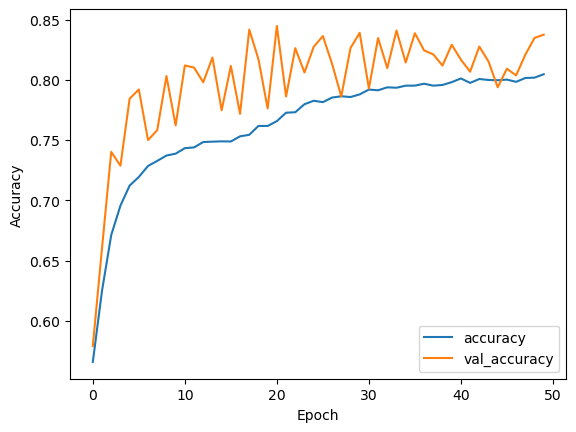

In [24]:
plt.plot(historyCNN.history['accuracy'], label='accuracy')
plt.plot(historyCNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [25]:
y_pred=modelCNN.predict(X_test)
yPred=y_pred.round().astype(int)
y_test=y_test.astype(int)
multilabel_confusion_matrix(y_test,yPred)

371/371 [==============================] - 1s 2ms/step


array([[[ 6629,   446],
        [ 1139,  3642]],

       [[11594,     0],
        [  262,     0]],

       [[11744,     0],
        [  112,     0]],

       [[11841,     0],
        [   15,     0]],

       [[ 1529,   731],
        [ 2565,  7031]]], dtype=int64)

In [26]:
modelCNN.save('modelCNNcolor.h5')